
# Segmentação de Clientes

##### A segmentação de clientes é o processo de dividir os clientes em grupos com base em características comuns, para que as empresas possam comercializar para cada grupo de forma eficaz e adequada ou compreender o padrão de consumo dos clientes.

In [7]:
# Imports

# Manipulação e visualização de dados
import time
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as m
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# Formatação dos gráficos
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
%matplotlib inline

# Ignora warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Para instalar uma versão específica do Scikit-Learn, por exemplo:
!pip install -q -U scikit-learn==0.23.1

In [9]:
# Carrega o dataset
df = pd.read_csv("dados/dataset.csv", encoding = 'utf-8')

In [10]:
# Shape
df.shape

(260645, 7)

In [11]:
# Visualiza os dados
df.head(5)

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059


### Análise Exploratória

Vamos explorar os dados por diferentes perspectivas e compreender um pouco mais o relacionamento entre as variáveis.

In [12]:
# Verifica o total de valores únicos por coluna
df.nunique()

id_transacao       100000
horario_pedido      76799
localidade              9
nome_item               4
quantidade_item         5
latitude                9
longitude               9
dtype: int64

In [13]:

df.dtypes

id_transacao        object
horario_pedido      object
localidade           int64
nome_item           object
quantidade_item      int64
latitude           float64
longitude          float64
dtype: object

In [14]:
# Resumo das colunas numéricas
df.describe()

,localidade,quantidade_item,latitude,longitude
count,260645.000000,260645.000000,260645.000000,260645.000000
mean,5.134904,2.447010,41.836095,-87.733930
std,2.551846,1.330863,0.144459,0.136369
min,1.000000,1.000000,41.524598,-88.010140
25%,3.000000,1.000000,41.784576,-87.849468
50%,5.000000,2.000000,41.881818,-87.677606
75%,7.000000,4.000000,41.889047,-87.627059
max,9.000000,5.000000,42.049306,-87.607565


In [15]:
# Lista para receber o total de pedidos
total_pedidos = []

Loop para criar a tabela pivot totalizando os itens por transação.

In [16]:
%%time

# P cada id e cada grupo do 'group by' por id_transacao
for k, group in df.groupby('id_transacao'):
    
    # Para cada id e cada grupo do group by por horario_pedido
    for m, n in group.groupby('horario_pedido'):
        
        # Para cada item de cada grupo
        id_transacao = k
        horario_pedido = m
        localidade = n['localidade'].values.tolist()[0]
        bebida = 0
        pizza = 0
        sobremesa = 0
        salada = 0
        n = n.reset_index(drop = True)
        
        # conta itens pedidos
        for i in range(len(n)):
            item = n.loc[i, 'nome_item']
            num = n.loc[i, 'quantidade_item']
            
            if item == 'bebida':
                bebida = bebida + num
            
            elif item == 'pizza':
                pizza = pizza + num
            
            elif item == 'sobremesa':
                sobremesa = sobremesa + num
            
            elif item == 'salada':
                salada = salada + num
        
        output = [id_transacao, horario_pedido, localidade, bebida, pizza, sobremesa, salada]
        total_pedidos.append(output)
        

Wall time: 1min 34s


In [17]:
# list to dataframe
df_item_pedidos = pd.DataFrame(total_pedidos)

In [18]:
# Add nomes de colunas
df_item_pedidos.columns = ['id_transacao', 'horario_pedido', 'localidade', 'bebida', 'pizza', 'sobremesa', 'salada']

In [19]:

df_item_pedidos.shape

(100000, 7)

In [20]:

df_item_pedidos.nunique()

id_transacao      100000
horario_pedido     76799
localidade             9
bebida                 6
pizza                  6
sobremesa              5
salada                 6
dtype: int64

In [21]:
df.head(5) # dados originais

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059


In [22]:
df_item_pedidos.head(5)

,id_transacao,horario_pedido,localidade,bebida,pizza,sobremesa,salada
0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0
1,0x100058,2019-05-05 00:08:00,6,0,2,2,0
2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1
3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0
4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0


Com a tabela criada pivot, temos uma nova perspectiva dos dados.

### Ajuste de Índices

PAra segmentar corretamente os pedidos precisa identificar uma coluna de id para cada registro, logo nao pode-se usar id_transacao pois esta coluna representa um dado valido e nao unico.

In [23]:
# Dataset
df_item_pedidos

,id_transacao,horario_pedido,localidade,bebida,pizza,sobremesa,salada
0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0
1,0x100058,2019-05-05 00:08:00,6,0,2,2,0
2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1
3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0
4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0
...,...,...,...,...,...,...,...
99995,0xffe96,2019-01-05 19:28:00,4,4,4,4,0
99996,0xffeed,2019-08-08 00:42:00,2,0,1,1,0
99997,0xfff07,2019-05-04 00:48:00,2,1,1,1,0
99998,0xfff4d,2019-07-18 00:17:00,3,0,2,2,0


In [24]:
# Índice
df_item_pedidos.index

RangeIndex(start=0, stop=100000, step=1)

In [25]:
# Fazemos o reset no índice e gravamos o resultado em outro dataframe
df_item_pedidos_idx = df_item_pedidos.reset_index()

In [26]:
# Pronto, agora temos uma coluna de ID com valor único para cada registro
df_item_pedidos_idx.head()

,index,id_transacao,horario_pedido,localidade,bebida,pizza,sobremesa,salada
0,0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0
1,1,0x100058,2019-05-05 00:08:00,6,0,2,2,0
2,2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1
3,3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0
4,4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0


In [27]:
# Dataset
df_item_pedidos.head(3)

,id_transacao,horario_pedido,localidade,bebida,pizza,sobremesa,salada
0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0
1,0x100058,2019-05-05 00:08:00,6,0,2,2,0
2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1


### Análise Descritiva

### Distplot dos Atributos Usados Para Segmentação

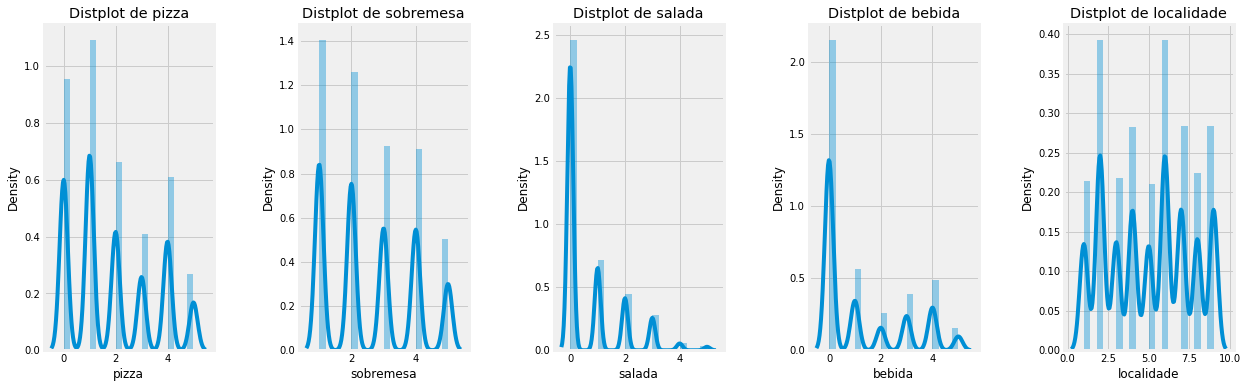

In [28]:
# Plot

plt.figure(1 , figsize = (19 , 6))

n = 0 

# Percorre colunas
for x in ['pizza' , 'sobremesa' , 'salada', 'bebida', 'localidade']:
    n += 1
    plt.subplot(1 , 5 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df_item_pedidos[x] , bins = 20)
    plt.title('Distplot de {}'.format(x))
plt.show()

### Gráfico de Total de Pedidos Por Localidade

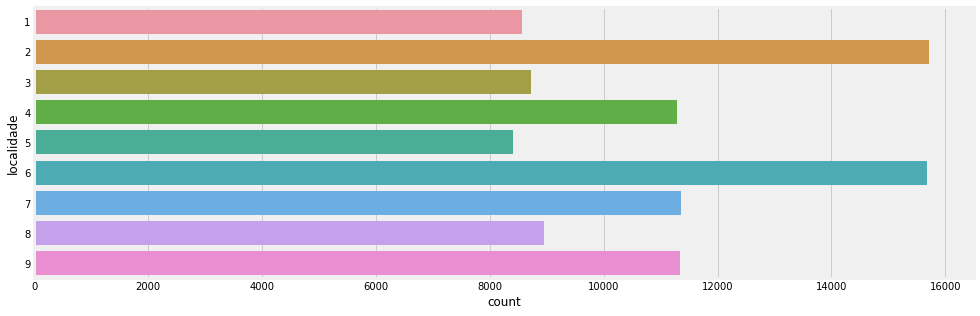

In [29]:
# Plot
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'localidade' , data = df_item_pedidos)
plt.show()

### Regplot dos Atributos Usados Para Segmentação

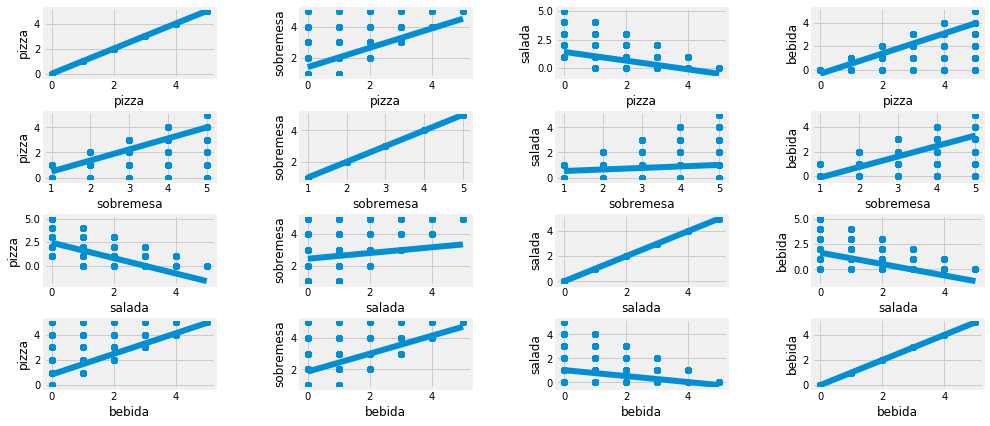

In [30]:
# Relação Entre os Atributos

plt.figure(1 , figsize = (15 , 7))

n = 0 

# percorre atributos
for x in ['pizza' , 'sobremesa' , 'salada', 'bebida']:
    for y in ['pizza' , 'sobremesa' , 'salada', 'bebida']:
        n += 1
        plt.subplot(4 , 4 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df_item_pedidos)
        plt.ylabel(y)
plt.show()

### Definindo as Variáveis Para Segmentação

Remove id_transacao, horario_pedido, localidade para clusterização.

In [31]:
# Filtrando o dataframe por colunas 
df_item_pedidos_idx[['index', 'bebida', 'pizza', 'sobremesa', 'salada']]

,index,bebida,pizza,sobremesa,salada
0,0,0,1,1,0
1,1,0,2,2,0
2,2,4,4,5,1
3,3,0,1,1,0
4,4,3,3,3,0
...,...,...,...,...,...
99995,99995,4,4,4,0
99996,99996,0,1,1,0
99997,99997,1,1,1,0
99998,99998,0,2,2,0


In [32]:
# Novo DF
df_novo = df_item_pedidos_idx[['index', 'bebida', 'pizza', 'sobremesa', 'salada']]

In [33]:
# Dataset
df_novo.head()

,index,bebida,pizza,sobremesa,salada
0,0,0,1,1,0
1,1,0,2,2,0
2,2,4,4,5,1
3,3,0,1,1,0
4,4,3,3,3,0


In [34]:
# com duas var
X1 = df_novo[['pizza' , 'sobremesa']].iloc[: , :].values

In [35]:
# Lista do WCSS - kmeans
wcss_X1 = []

#### Segmentação 1 - Encontrando o Valor Ideal de Clusters

Testando diferentes valores de K (valores de cluster) entre 2 e 10.

Para a inicialização dos clusters, o algoritmo k-means++ oferece convergência rápida para resultado final.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [36]:
# Loop para testar os valores de K
for n in range(2, 11):
    modelo = (KMeans(n_clusters = n,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo.fit(X1)
    wcss_X1.append(modelo.inertia_)

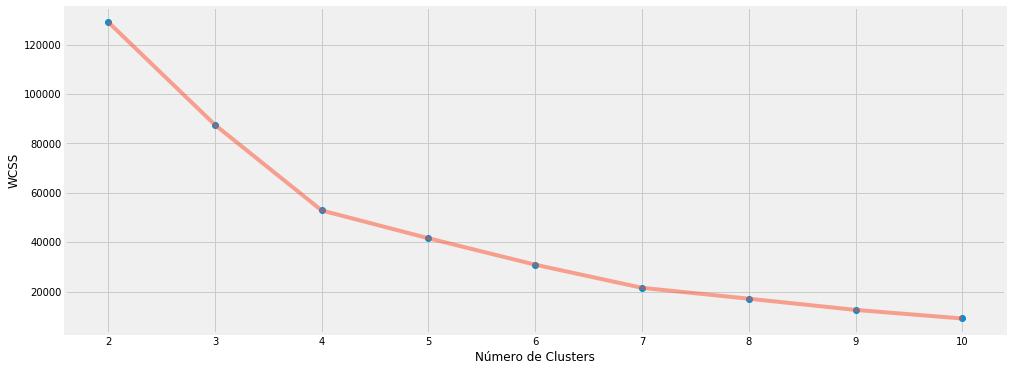

In [37]:
# Plot
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , wcss_X1 , 'o')
plt.plot(np.arange(2 , 11) , wcss_X1 , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('WCSS')
plt.show()

Acima a curva ELBOW. Valor de 'n' deve ser alinhado com necessidade do negocio (x propagandas de marketing por ex). Aqui vamos por 2 e ver os resuiltados

In [38]:
# Criação do modelo
modelo_seg1 = KMeans(n_clusters = 2, 
                     init = 'k-means++', 
                     n_init = 10, 
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan')

In [39]:
# Treinamento
modelo_seg1.fit(X1)

KMeans(algorithm='elkan', n_clusters=2, random_state=111)

In [40]:
# Extração dos labels
labels1 = modelo_seg1.labels_
labels1

array([0, 0, 1, ..., 0, 0, 0])

In [41]:
# Extração dos centróides
centroids1 = modelo_seg1.cluster_centers_
centroids1

array([[0.881644  , 1.82183485],
       [3.79958153, 4.05580631]])

#### Segmentação 1 - Visualização e Interpretação dos Segmentos

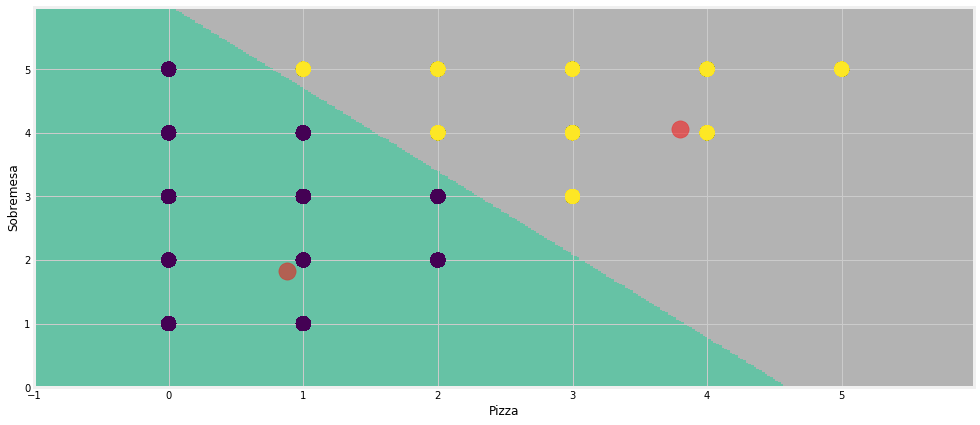

In [42]:
# Plot

# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo_seg1.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plotando
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plotando pontos
plt.scatter( x = 'pizza', y = 'sobremesa', data = df_novo, c = labels1, s = 200 )
plt.scatter(x = centroids1[: , 0], y =  centroids1[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Sobremesa')
plt.show()

Vemos que o ponto VERMELHO é o centroide de cada cluster(segmento), na area em verde os clientes pediram 0,1,2 pizzas e houve sobremesa.

Na área cinza, pediram mais pizza e com o aumento houve mais pedidos de sobremesas

Então no cluster 1 - Clientes que pedem menos Pizzas. Todos pedem sobremesa.
E no Cluster 2 - Clientes que pedem mais Pizzas. Todos pedem sobremesa em volume maior.

A loja poderia oferecer sobremesa gratis caso compre mais pizzas de maior valor.